In [1]:
import maintsim

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [11]:
np.argmax([1, 2, 99, 4, 5])

2

In [2]:
sys = maintsim.System(process_times=[3, 5, 2],
                      failure_mode='degradation',
                      failure_params=[0.2]*3,
                      repair_params={'CM':stats.randint(10,20)},
                      scheduling='priority',
                      maintenance_capacity=1)#,
                      #planned_failures=[(1,30,20)])

In [4]:
sys.simulate(sim_time=100)

M0 failed at t=48
M0 yielded CM request at t=48
M2 failed at t=52
M0 repaired at t=67
t=67, M2 priority=2


Interrupt: Interrupt(None)

In [9]:
sys.machines[0].under_repair

True

In [4]:
sys.maintenance_data.dropna()

,time,machine,type,activity,duration
100,59,0,CM,failure,NA
101,59,2,CM,failure,NA
0,93,2,CM,repair,15


In [6]:
sys.machines[1].health

10

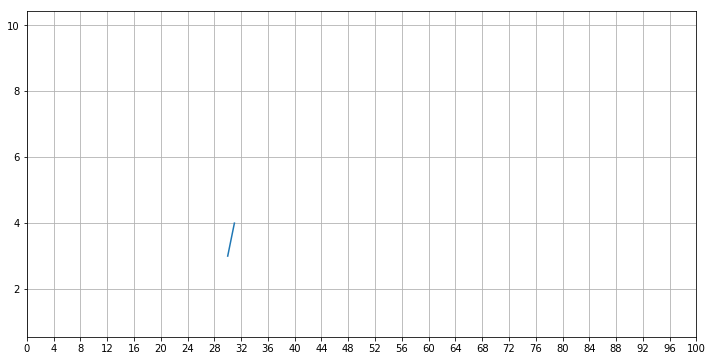

In [5]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data['M1 health'])
plt.xticks(list(range(0,101,4)))
plt.grid()
plt.show()

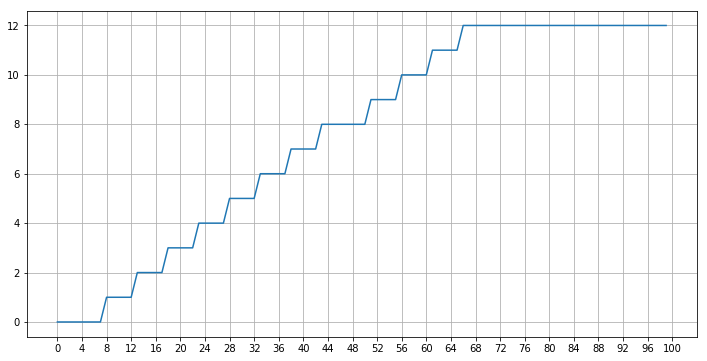

In [7]:
plt.figure(figsize=(12,6))
plt.plot(sys.production_data['M1 production'])
plt.xticks(list(range(0,101,4)))
plt.grid()
plt.show()